### MACHINE LEARNING (ML) WORKFLOW

### Project Objective
+ Predict if a patient having Hepatitis will live or die based on Machine Learning (ML) parameters

### Workflow
1. Data Preparation
2. Data Transformation
3. Exploratory Data Analysis (EDA)
4. Feature selection
5. Build model
6. Save model
7. Interpret model
8. Evaluate model

In [1]:
# Load my EDA Packages
import pandas as pd
import numpy as np

In [2]:
# Load our Data visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load My Dataset
df = pd.read_csv("C:\Datasets\hepatitis.data")

In [4]:
# Preview the first data point
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [5]:
col_names = ["Class",
 "AGE",
 "SEX",
 "STEROID",
 "ANTIVIRALS",
 "FATIGUE",
 "MALAISE",
 "ANOREXIA",
 "LIVER BIG",
 "LIVER FIRM",
 "SPLEEN PALPABLE",
 "SPIDERS",
 "ASCITES",
 "VARICES",
 "BILIRUBIN",
 "ALK PHOSPHATE", 
 "SGOT",
 "ALBUMIN",
"PROTIME",
"HISTOLOGY"]


In [6]:
# Assign names to the data points
df = pd.read_csv("C:\Datasets\hepatitis.data", names=col_names)

In [7]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [8]:
# Clean our columns
df.columns = df.columns.str.lower().str.replace(" ","_")

In [9]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [10]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [11]:
# Treating missing values
# Replace ? with 0
df = df.replace("?", 0)

In [12]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [13]:
# Data types
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [14]:
#How many columns with objects
sum(df.dtypes == 'object')

15

In [15]:
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [16]:
# Data Transformation (Casting)
#Converting from one data type to another
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [17]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int32
antivirals          int64
fatigue             int32
malaise             int32
anorexia            int32
liver_big           int32
liver_firm          int32
spleen_palpable     int32
spiders             int32
ascites             int32
varices             int32
bilirubin          object
alk_phosphate       int32
sgot                int32
albumin            object
protime             int32
histology           int64
dtype: object

In [18]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [19]:
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

In [20]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

In [21]:
df.to_csv("C:\Datasets\cleaned_hep_data.csv", index=False)


### Narrative
+ With a Data Transformation Technique called Casting my Data Objects were converted to interger and float

### Exploratory Data Analysis (EDA)
+ Descriptive Analysis

In [22]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [23]:
target_label = {"Die":1, "Live":2}

In [24]:
# Value count 
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

<Axes: >

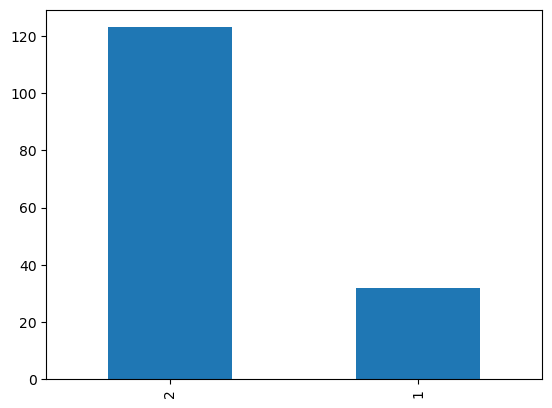

In [25]:
# Plot of value
df['class'].value_counts().plot(kind='bar')

In [26]:
# How many are males(1) and females(2)
df['sex'].unique()

array([2, 1], dtype=int64)

In [27]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

### Narrative
+ There are more males than females in our dataset

### Frequency distribution table using the Age Range

In [28]:
df['age'].max()

78

In [29]:
df['age'].min()

7

In [30]:
labels = ["Less than 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()

In [31]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

<Axes: xlabel='age'>

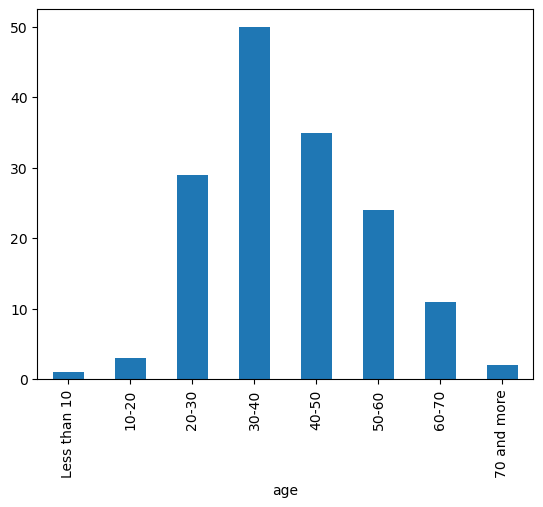

In [32]:
freq_df.plot(kind="bar")

### Narrative 1
+ Highest prevalence of Hepatitis is from 30 - 40 years
+ The least is individual under 10 years, and elderly above 70 years

### Checking for outliers
+ Univariate Analysis
+ Multivariate Analysis

### Methods
+ Boxplot (Uni)
+ Scatterplot (Multi)
+ Z-score
+ IQR (Interquantile Range)

<Axes: >

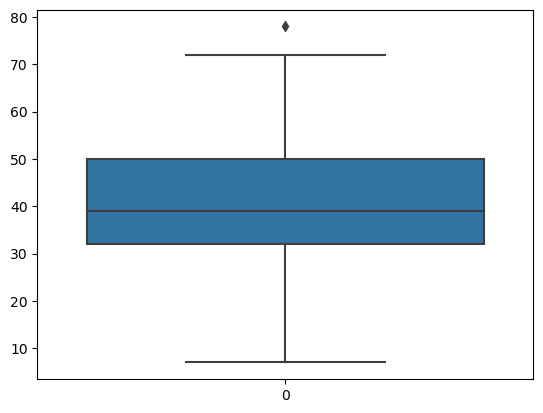

In [33]:
### Using Box-plot for outliers detection
import seaborn as sns
sns.boxplot(df['age'])

<Axes: >

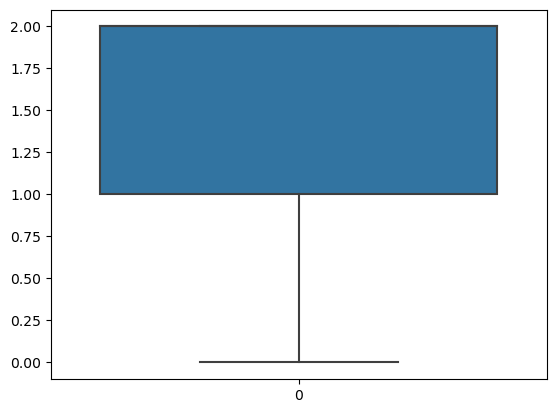

In [34]:
sns.boxplot(df['steroid'])

### Using Interquartile Range
+ H-Spread/Mid_Spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [35]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [36]:
IQR = q1 - q3

In [37]:
IQR

class               0.00
age               -18.00
sex                 0.00
steroid            -1.00
antivirals          0.00
fatigue            -1.00
malaise            -1.00
anorexia            0.00
liver_big           0.00
liver_firm         -1.00
spleen_palpable     0.00
spiders            -1.00
ascites             0.00
varices             0.00
bilirubin          -0.80
alk_phosphate     -68.50
sgot              -68.50
albumin            -1.15
protime           -65.00
histology          -1.00
dtype: float64

In [38]:
### Get the actual data point that is an outlier
(df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,True,True,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
1,False,True,False,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
2,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
3,False,True,False,True,True,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
4,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,False,True,False,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True
151,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
152,False,True,False,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
153,False,True,True,True,False,True,True,False,False,True,True,True,False,True,True,True,True,True,True,True


### Narative 
+ The data points with True are the Outliers


#### Solution
+ Remove
+ Change
+ Ignore

In [39]:
#Removing all outliers
df_no_outlier = df[-((df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [40]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology


In [41]:
print(df.shape)

(155, 20)


In [42]:
print(df_no_outlier.shape)

(0, 20)


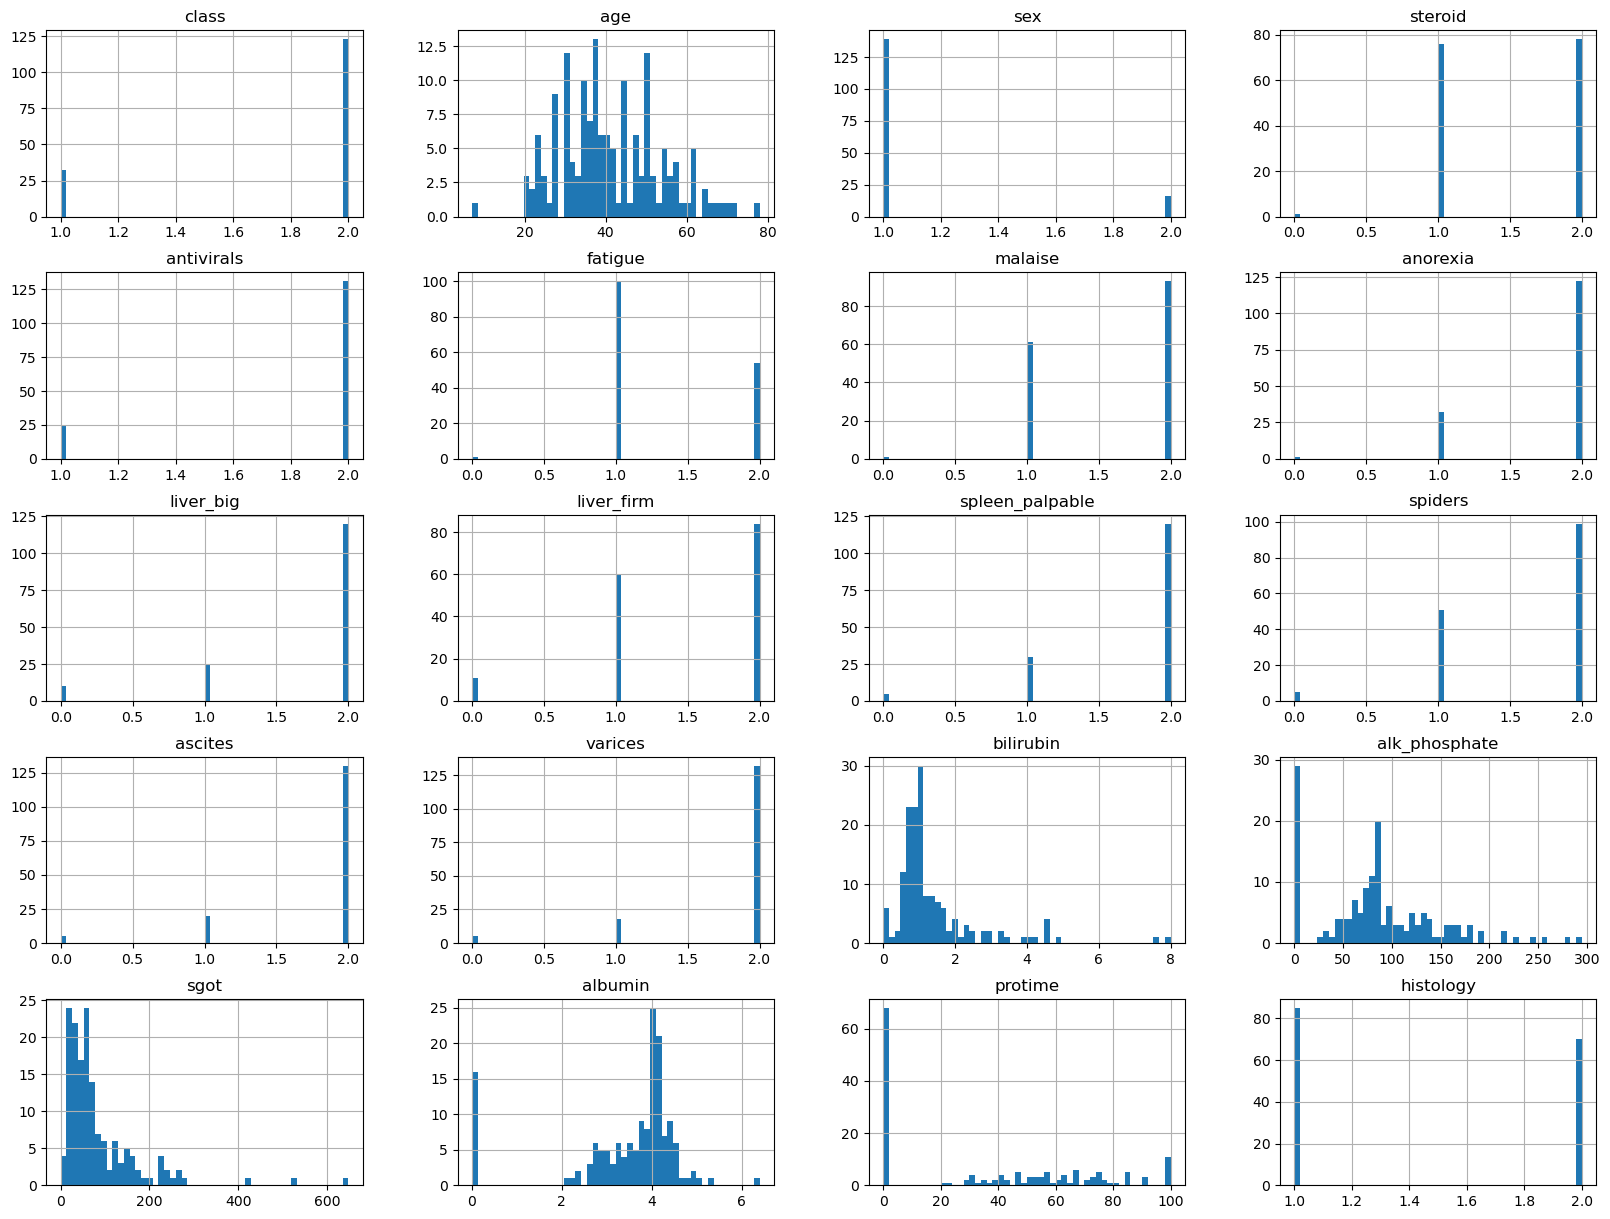

In [43]:
### Plot of distribution of data
df.hist(bins=50, figsize=(20,15))
plt.show()

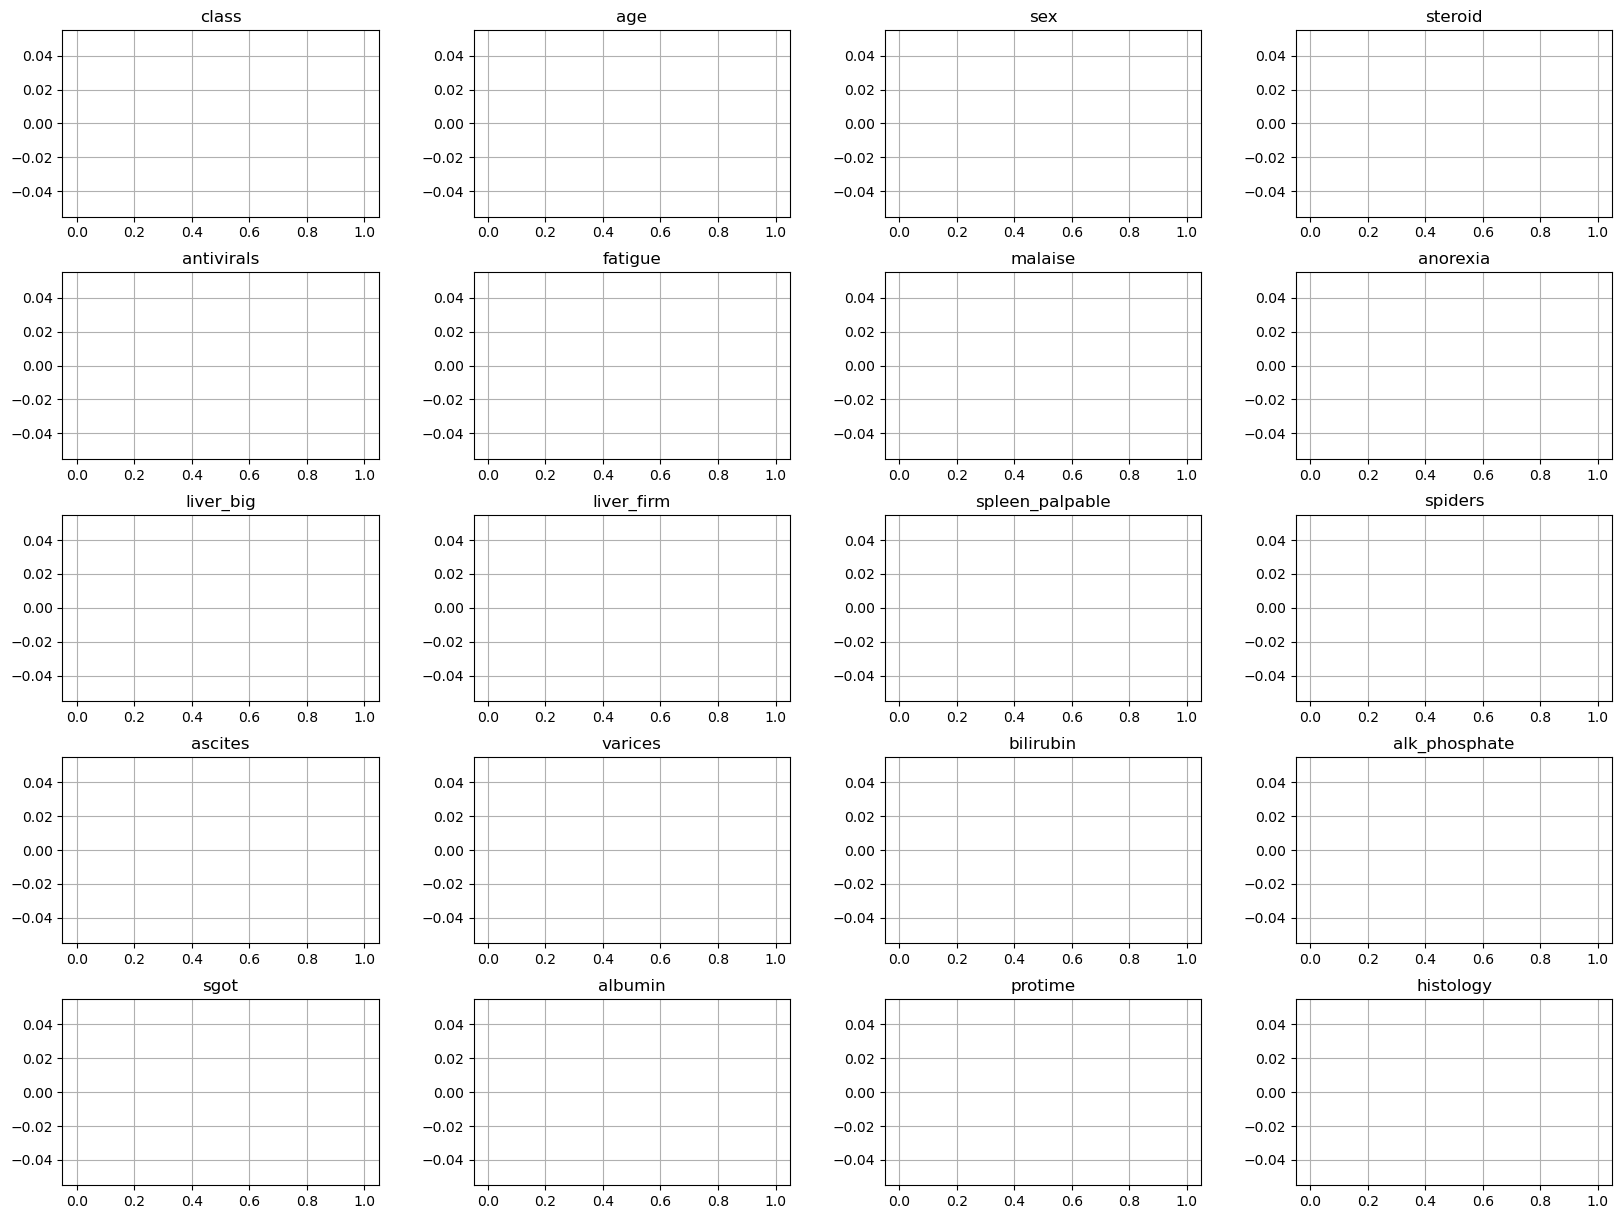

In [44]:
### Plot of distribution of data
df_no_outlier.hist(bins=50, figsize=(20,15))
plt.show()

### Feature Selection and Importance
+ SelectKbest
  - Strong relationship with the output/target

+ Recursive Feature Elimination

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [47]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']] 

ylabels = df['class']

In [48]:
# Using Skbest
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeatures, ylabels)

In [49]:
# Highest score shows the best fit
print("Scores", best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [50]:
# Mapping to feature name
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])

In [51]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [52]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores, feature_column_names], axis=1)

In [53]:
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [54]:
# Get the best feature
# The higher the number the more important the feature
best_feat_df.nlargest(10, 'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [55]:
best_feat_df.nlargest(10, 'Feature_Scores') ['Feature_name'].unique

<bound method Series.unique of 17          protime
15             sgot
13        bilirubin
0               age
14    alk_phosphate
16          albumin
10          spiders
18        histology
5           malaise
4           fatigue
Name: Feature_name, dtype: object>

#### Recursive Feature Elimination

In [56]:
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
logit = LogisticRegression()

In [58]:
rfe = RFE(estimator=logit, n_features_to_select=8)

In [59]:
rfe_fit = rfe.fit(xfeatures, ylabels)

In [60]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_, columns=['Selected Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns=['Ranking Features'])

In [61]:
rfe_feature_df = pd.concat([feature_column_names, selected_features, ranking_features], axis=1)

In [62]:
rfe_feature_df

,Feature_name,Selected Features,Ranking Features
0,age,False,9
1,sex,True,1
2,steroid,False,5
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


### Narrative
+ RFE we will eliminate the lowest rating or true

### Checking for feature importance
+ ExtraTreeClassifier
+ Which feature is important

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier()

In [65]:
# Print Importance
print(et_clf.feature_importances_)

[0.05586278 0.02074027 0.03214761 0.00933297 0.02984792 0.05467003
 0.0264761  0.04036962 0.04996545 0.0408868  0.0732806  0.0864952
 0.05361484 0.09892124 0.07251325 0.05519097 0.07286772 0.05919914
 0.06761749]


In [66]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index=xfeatures.columns)

In [67]:
feature_importance_df

age                0.055863
sex                0.020740
steroid            0.032148
antivirals         0.009333
fatigue            0.029848
malaise            0.054670
anorexia           0.026476
liver_big          0.040370
liver_firm         0.049965
spleen_palpable    0.040887
spiders            0.073281
ascites            0.086495
varices            0.053615
bilirubin          0.098921
alk_phosphate      0.072513
sgot               0.055191
albumin            0.072868
protime            0.059199
histology          0.067617
dtype: float64

<Axes: >

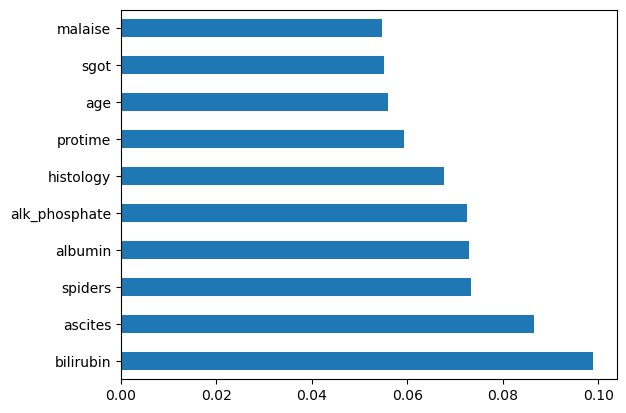

In [68]:
feature_importance_df.nlargest(10).plot(kind='barh')

### Narrative 
+ All the methods (SelectKBest, RFE & ExtCLF ) gave me almost thesame features to use

### Checking for correlation
+ Heat Map for correlation

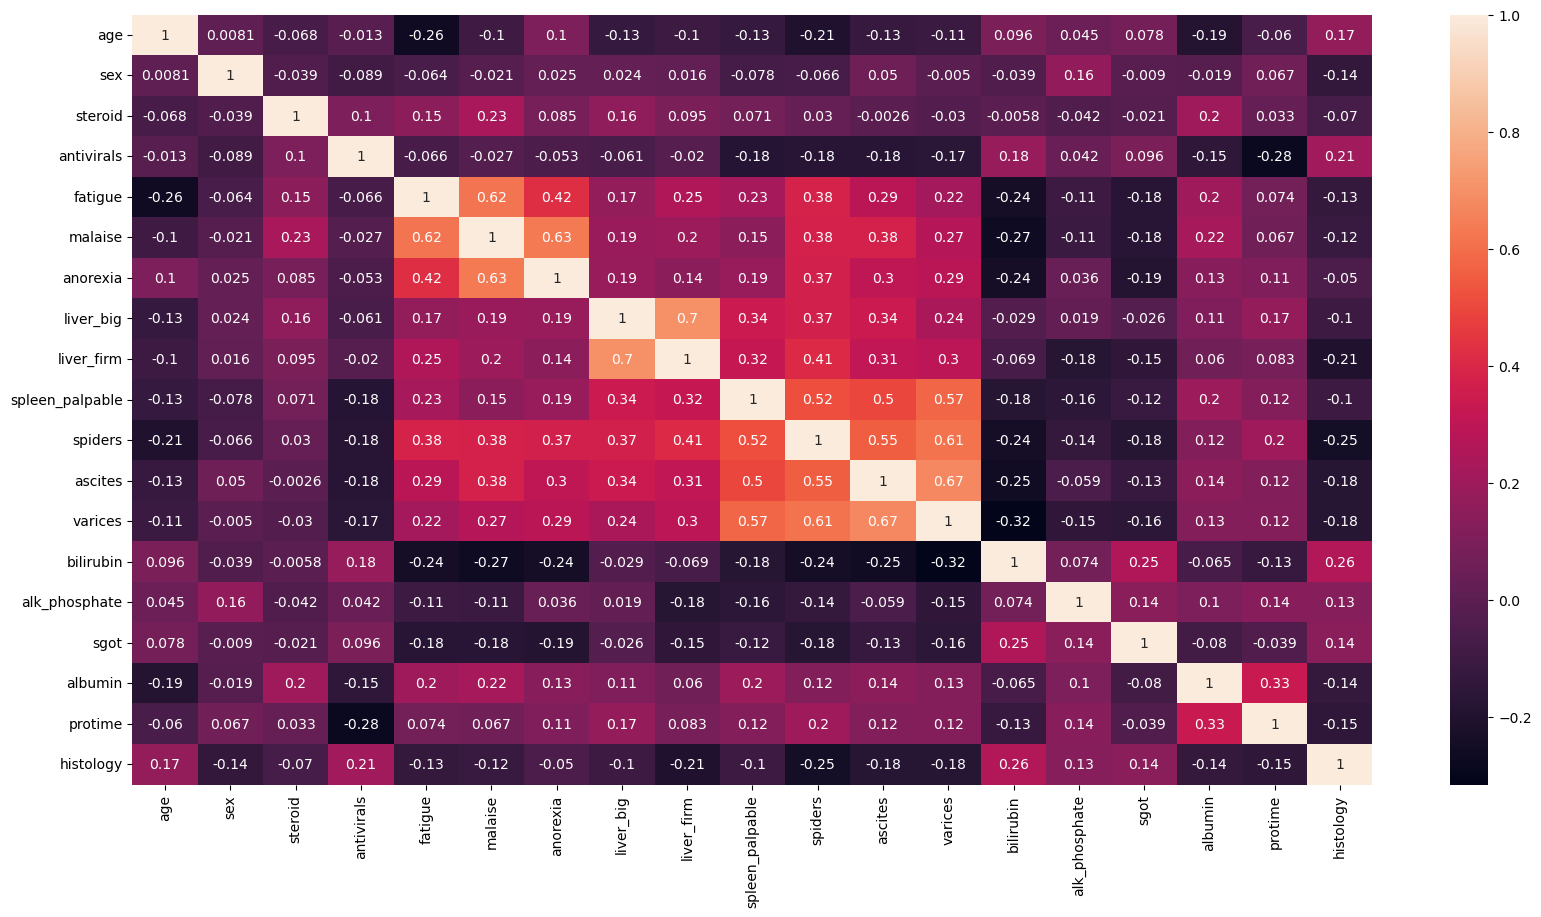

In [69]:
plt.figure(figsize=(20, 10))
sns.heatmap(xfeatures.corr(), annot=True)
plt.show()

### Model Building 
+ Features & labels
+ Data Train/Test/Split
+ Algorithm Comparisms
+ Logistic Regression
+ K-Nearest Neighbour
+ Decision Tree Classifier
+ Support Vector Machine
+ Linear Discriminant Analysis
+ Serialize (Save Model)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [71]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [72]:
ylabels

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: class, Length: 155, dtype: int64

In [73]:
#Selected Features
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [103]:
  xfeatures_best =  df[['age',
     'sex',
     'steroid',
     'antivirals',
     'sgot',        
     'bilirubin',
     'alk_phosphate',
     'albumin',
     'spiders',
     'histology',
     'fatigue' ]]

In [104]:
# Train/Test Dataset
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.30, random_state=7)

In [105]:
# Train/Test Dataset for best features
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, test_size=0.30, random_state=7)

In [106]:
# Comparing ML Algorithms
# Spot Checking ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [107]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(model, x_train_b, y_train_b, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

LR: 83.363636 (0.120471)
LDA: 85.181818 (0.093070)
CART: 73.272727 (0.108498)
SVM: 82.454545 (0.117835)
KNN: 79.636364 (0.097506)
NB: 64.818182 (0.135820)


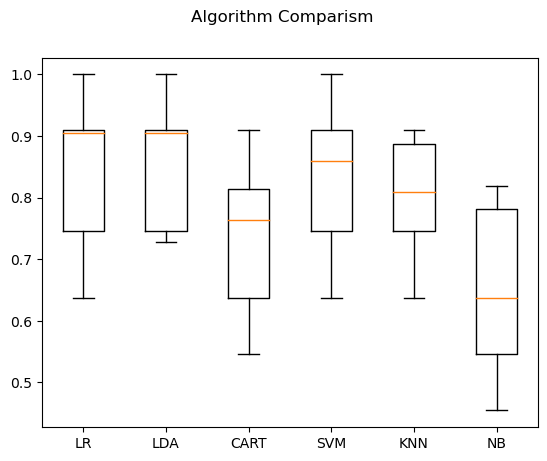

In [108]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparism')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [109]:
# Building Model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [111]:
# Model Accuracy
# Method 1
logreg.score(x_test, y_test)*100

72.3404255319149

In [112]:
# Building Model for Best features
model_logit = LogisticRegression()
model_logit.fit(x_test_b, y_test_b)

LogisticRegression()

In [113]:
# Model Accuracy for best features
# Method 1
model_logit.score(x_test_b, y_test_b)*100

93.61702127659575

In [114]:
# Single prediction
x_test.iloc[0]

age                 50.0
sex                  2.0
steroid              1.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            0.9
alk_phosphate      230.0
sgot               117.0
albumin              3.4
protime             41.0
histology            2.0
Name: 90, dtype: float64

In [115]:
res_dic = {"Die":1, "Live":2}
x1 = x_test.iloc[1]

In [116]:
# Reshaping
logreg.predict(np.array(x1).reshape(1, -1))

array([2], dtype=int64)

In [117]:
### Alternative Algorithms
clf = DecisionTreeClassifier()

In [118]:
# Fit model
clf.fit(x_train_b, y_train_b)

DecisionTreeClassifier()

In [119]:
# Model Accuracy score
clf.score(x_test_b, y_test_b)*100

72.3404255319149

In [120]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [121]:
# Fit
knn.fit(x_train_b, y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [122]:
# Accuracy score
knn.score(x_test_b, y_test_b)*100

70.2127659574468

In [123]:
# Using support vector machine
svm = SVC()
svm.fit(x_test_b, y_test_b)
svm.score(x_test_b, y_test_b)*100

72.3404255319149

In [124]:
# Using Linear Discriminant Analysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(x_test_b, y_test_b)
model_lda.score(x_test_b, y_test_b)*100

95.74468085106383

### Save our model
+ Serialization
+ Joblib
+ Pickle
+ numpy/json/ray

In [96]:
# Using Joblib
import joblib

In [99]:
model_file_logit = open("C:\Predictive models\logistic_regression_hepB_model.pkl", "wb")
joblib.dump(model_logit, model_file_logit)
model_file_logit.close()

In [98]:
model_file_knn = open("C:\Predictive models\knn_hepB_model.pkl", "wb")
joblib.dump(knn, model_file_knn)
model_file_knn.close()

In [100]:
model_file_clf = open("C:\Predictive models\decision_tree_clf_hepB_model.pkl", "wb")
joblib.dump(clf, model_file_clf)
model_file_clf.close()

In [101]:
model_file_svm = open("C:\Predictive models\support_vector_clf_hepB_model.pkl", "wb")
joblib.dump(svm, model_file_svm)
model_file_svm.close()

In [102]:
model_file_lda = open("C:\Predictive models\lda_hepB_model.pkl", "wb")
joblib.dump(model_lda, model_file_lda)
model_file_lda.close()

In [ ]:
# Create decision tree plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [ ]:
feature_names_best = xfeatures_best.columns

In [ ]:
target_names = ["Die", "Live"]

In [ ]:
# Create a Dot Plot
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names_best, class_names=target_names)

In [ ]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

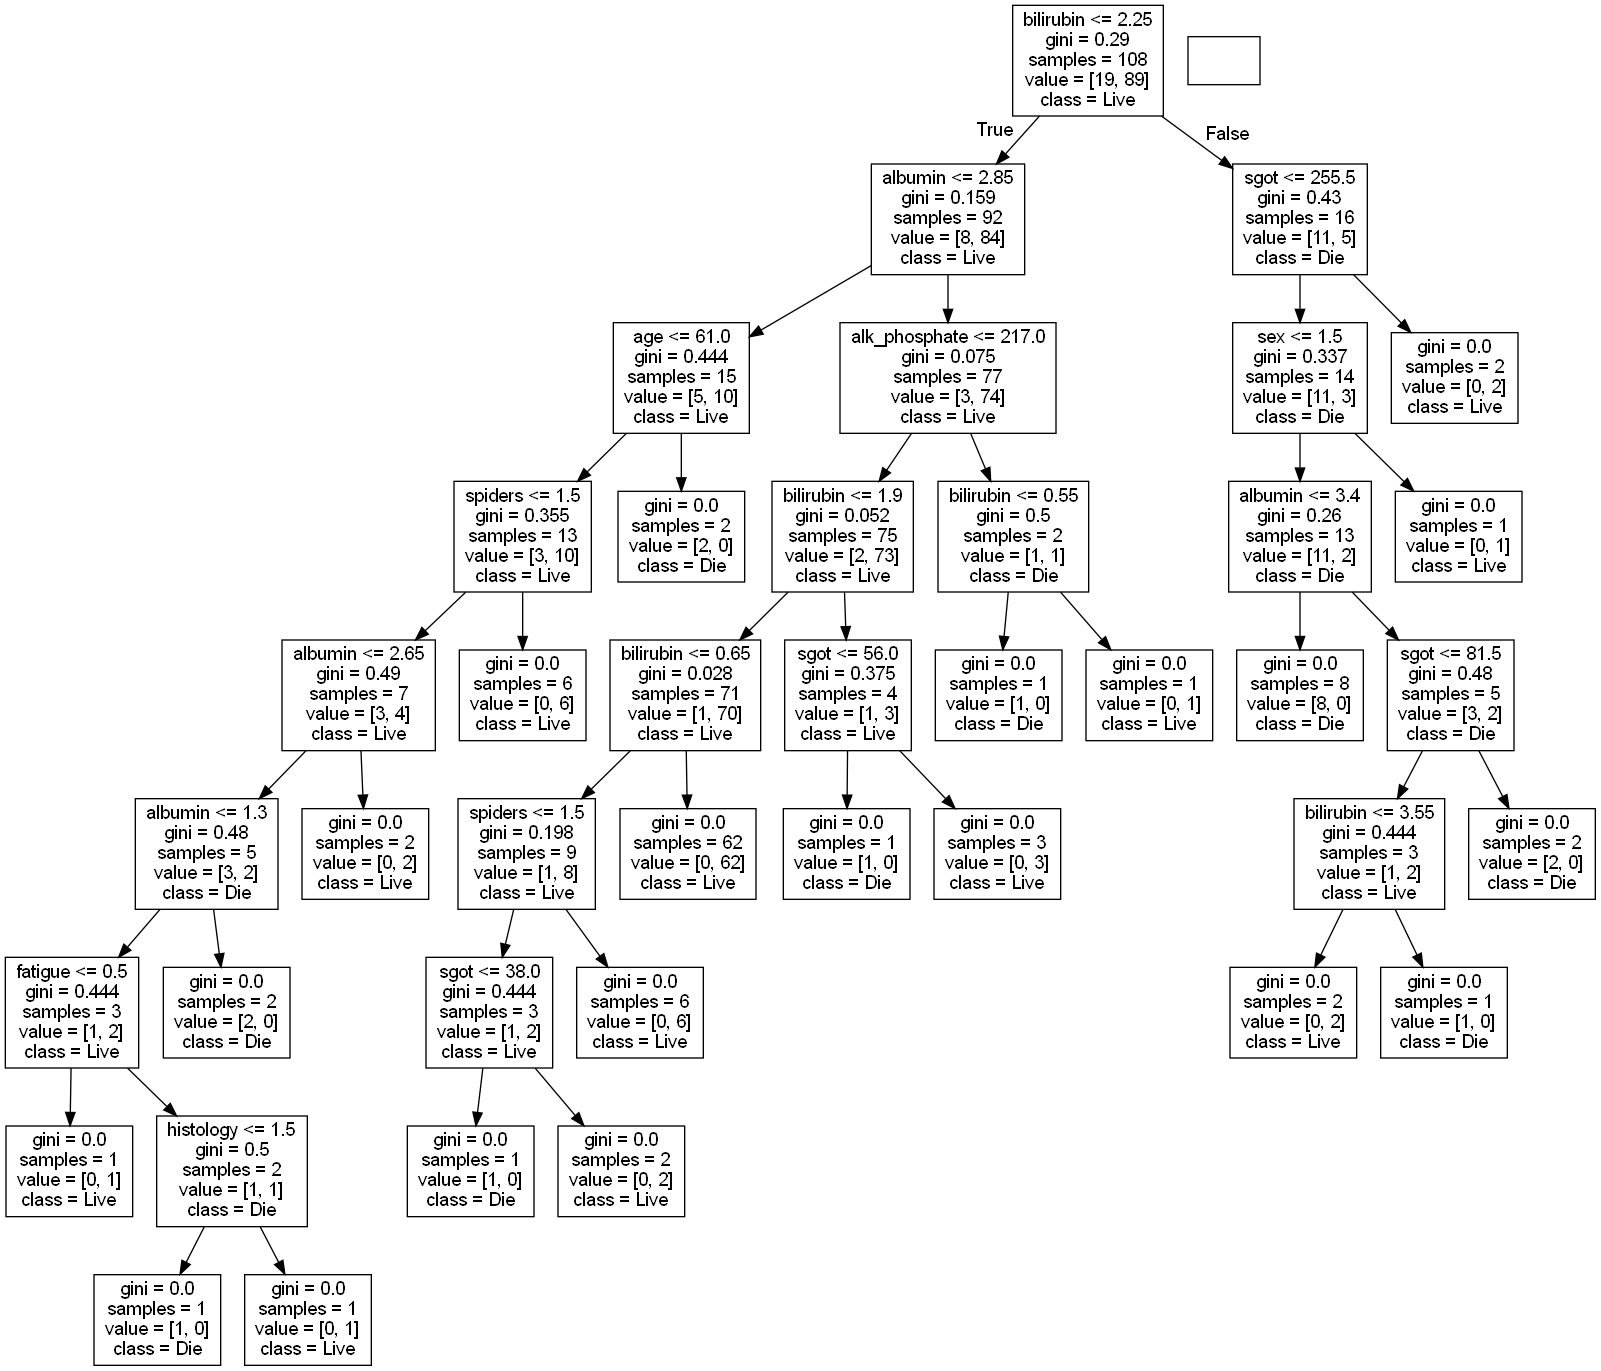

In [ ]:
Image(graph.create_png())

In [ ]:
# Save the Plot
graph.write_png("hep_decision_tree_plot.png")

True

### Interprete model and evaluate
+ Eli5 
+ Lime
+ SHAP
+ Skater

In [ ]:
# Interpreting with Lime
import lime
import lime.lime_tabular

In [ ]:
# Methods and attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

### Create Explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [ ]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'sgot', 'bilirubin',
       'alk_phosphate', 'albumin', 'spiders', 'histology', 'fatigue'],
      dtype='object')

In [ ]:
target_names

['Die', 'Live']

In [ ]:
class_names = ["Die(1)", "Live(2)"]

In [ ]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values, 
                                      feature_names=feature_names_best, 
                                      class_names=class_names, 
                                      discretize_continuous=True)

In [ ]:
x1

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [ ]:
x_test_b.iloc[1]

age               58.0
sex                1.0
steroid            2.0
antivirals         2.0
sgot             242.0
bilirubin          2.0
alk_phosphate    167.0
albumin            3.3
spiders            1.0
histology          1.0
fatigue            1.0
Name: 76, dtype: float64

array([2], dtype=int64)

In [ ]:
exp = explainer.explain_instance(x_test_b.iloc[1], model_lda.predict_proba, num_features=14, top_labels=1)

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
# Explanation as list
exp.as_list()

[('histology <= 1.00', 0.538665007415337),
 ('fatigue <= 1.00', -0.33679818639291803),
 ('sex <= 1.00', -0.20508760239794152),
 ('alk_phosphate > 119.25', 0.1668249768751849),
 ('age > 50.25', -0.1657128061994106),
 ('spiders <= 1.00', -0.1618363253114444),
 ('sgot > 90.50', 0.13869753067248813),
 ('bilirubin > 1.50', -0.059740896434923495),
 ('1.50 < steroid <= 2.00', -0.028292060465144594),
 ('2.98 < albumin <= 4.00', 0.02257154790176813),
 ('antivirals <= 2.00', 0.0)]

### Evaluation of Model
+ Confusion Matrix
+ Classification Report
+ Accuracy Score

array([[12,  1],
       [ 1, 33]], dtype=int64)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.97      0.97      0.97        34

    accuracy                           0.96        47
   macro avg       0.95      0.95      0.95        47
weighted avg       0.96      0.96      0.96        47



In [ ]:
# Accuracy Score
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(x_test_b, y_test_b)
model_lda.score(x_test_b, y_test_b)*100

95.74468085106383